## Week 1: raster processing

My goal for this week is familiarization with juypter notebook formatting aswell as basics for raster processing.
I am using raster data for the Tsistika, a northern Vancouver Island watershed where I will be conducting my research

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import rioxarray as rxr
from rasterio.plot import show
import cartopy.crs as ccrs
import os

%matplotlib inline

ModuleNotFoundError: No module named 'rioxarray'

Use the rasterio library for opening/querying. rio.open("filepath") will create python object.

In [3]:
#change directory to working drive
os.chdir(r"Y:\Tsitika\2021\DEM")

Tsit_be = rio.open(r'Bare_Earth\Tsitika_3m_Snow_Free_DTM_WGS84_z9_ellips.tif')

Use attributes to query the data.  Can index this to use with processing, ie. may use the bounding box for clipping purposes.  Can also view the metadata, note using "display" is a easier to read format than print. And can also take a quick look at the data with rasterios plotting function.

In [4]:
print(Tsit_be.bounds)
print(Tsit_be.bounds[0])

BoundingBox(left=682263.72, bottom=5566966.44, right=698691.72, top=5585230.44)
682263.72


In [5]:
display(Tsit_be.meta)

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 5476,
 'height': 6088,
 'count': 1,
 'crs': CRS.from_epsg(32609),
 'transform': Affine(3.0, 0.0, 682263.72,
        0.0, -3.0, 5585230.44)}

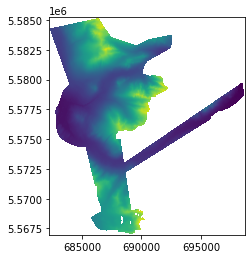

<AxesSubplot:>

In [6]:
rio.plot.show(Tsit_be)

In [7]:
Tsit_be.meta["width"]

5476

In [9]:
left_bound_BE = Tsit_be.bounds[0]
display(left_bound_BE)

682263.72

To assign the data in the raster to a numpy array, we use the "src.read" function on the open raster dataset

In [29]:
data_be = Tsit_be.read()
#assign the shape of the data to a variable
be_shape = data.shape
print(be_shape)
print("Number of pixels width: " + str(data.shape[1]))
print(type(data))

(1, 6088, 5476)
Number of pixels width: 6088
<class 'numpy.ndarray'>


Importing a snow-on raster, checking whether the data is the same size

In [79]:
#phase 1, snow on survey
Tsi_P01 = rio.open(r"Y:\Tsitika\2021\DEM\coregistered_STM_GUI\P01_TSI_slave.tif", masked=True)
print(Tsi_P01)
print("Numpy Array Shape:", lidar_dem_im.shape)")

<open DatasetReader name='Y:/Tsitika/2021/DEM/coregistered_STM_GUI/P01_TSI_slave.tif' mode='r'>


In [80]:
data_P01 = Tsi_P01.read()
P01_shape = data_P01.shape
#assign the shape of the data to variable
print(P01_shape)
print(data_P01)

(1, 6088, 5476)
[[[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]
  [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]
  [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]
  ...
  [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]
  [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]
  [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
   -3.4028235e+38 -3.4028235e+38]]]


In [33]:
#check if the arrays are the same. 
be_shape == P01_shape

True

In [43]:
Tsit_be.bounds == Tsit_P01.bounds
Tsit_be.transform == Tsit_P01.transform

True

In [69]:
P01_sd = data_P01 - data_be

[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
 -3.4028235e+38 -3.4028235e+38]


TypeError: Invalid shape (33337888,) for image data

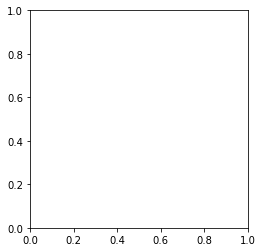

In [74]:
# flatten the data to a 1D array
P01_ravel = np.ravel(data_P01)
print(P01_ravel)

data_ma = np.ma.masked_less(P01_ravel,0)
plt.imshow(P01_ravel)


NameError: name 'img_extent' is not defined

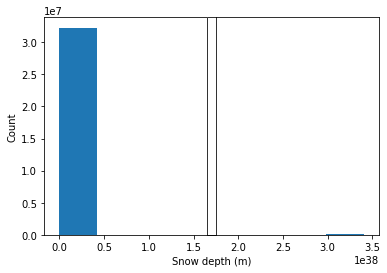

In [61]:
# find where elevation is less than zero
a = P01sd_ravel<0
#histogram of the valid data:
plt.hist(P01sd_ravel[~a], 8)
plt.xlabel('Snow depth (m)')
plt.ylabel('Count')

ax = plt.axes(projection=ccrs.UTM(10))
ax.imshow(data,origin='upper',
          extent=img_extent, 
          transform=ccrs.UTM(10))

The next goal is to a) loop through the snow-on rasters and check if arrays are the same, and have the same meta data 